# Cosinor Regression Model used for 24-hours Window Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma import add
from CosinorPy import file_parser, cosinor, cosinor1, cosinor_nonlin
np.seterr(divide='ignore')
import scipy.signal as signal
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as multi
from scipy.optimize import curve_fit
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import percentileofscore
from scipy.stats import circstd, circmean

import copy
import itertools
from random import sample
import os
import copy
from CosinorPy.helpers import df_add_row

### Data Preparation

In [2]:
def load_data(path):
    """Function used to parser the data using the file_parser method from the CosinorPy package"""
    df = pd.read_csv(path)
    df['Region start time'] = pd.to_datetime(df['Region start time'])
    df['date'] = df['Region start time'].dt.date
    df['hour'] = df['Region start time'].dt.hour
    df = df.drop('Unnamed: 0', axis=1)
    return df

In [3]:
pre_data = load_data("data/RNS_G_Pre_output.csv")
post_data = load_data("data/RNS_G_M1_output.csv")

In [ ]:
def prepare_data(df):
    """Function used to prepare the data for Cosinor Regression"""
    df1 = df.copy()
    # This creates a new column called week
    start_date = df1['date'].min()
    df1['week'] = ((df1['date'] - start_date) // 7) + 1
    df1['week'] = df1['week'].apply(lambda x: f"week{x}")

    df1["test"] = df1["week"].astype(str)
    df1["x"] = df1["hour"]
    df1["y"] = df1["Pattern A Channel 2"]
    
    return df1

In [9]:
df_results_pre_data = cosinor.population_fit_group(prepare_data(pre_data), n_components = [1,2,3], period=24, plot=False)
df_best_models_pre_data = cosinor.get_best_models_population(prepare_data(pre_data), df_results_pre_data, n_components = [1,2,3])
cosinor.plot_df_models_population(prepare_data(pre_data), df_best_models_pre_data)
df_best_models_pre_data

AttributeError: 'Series' object has no attribute 'days'

/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: invalid value encountered in scalar divide
  F = (SSLOF/(n_T-1-2*n_components))/(SSPE/(N-n_T))
/opt/anaconda3/lib/python3.12/site-packages/CosinorPy/cosinor.py:1658: RuntimeWarning: inv

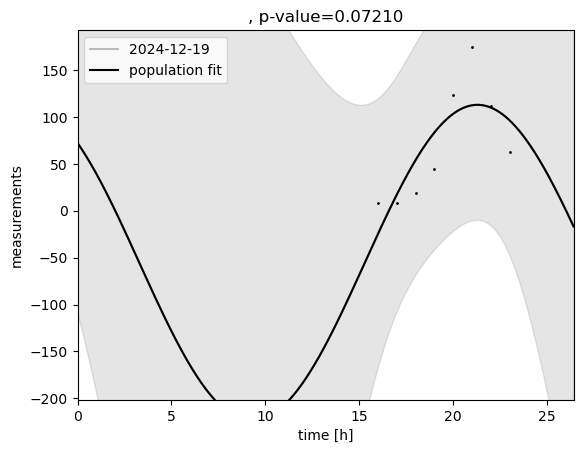

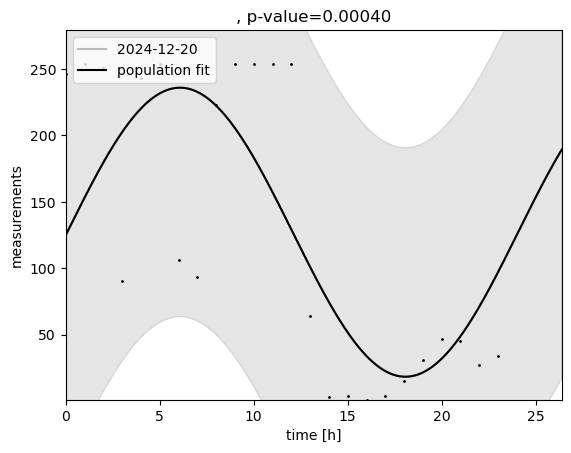

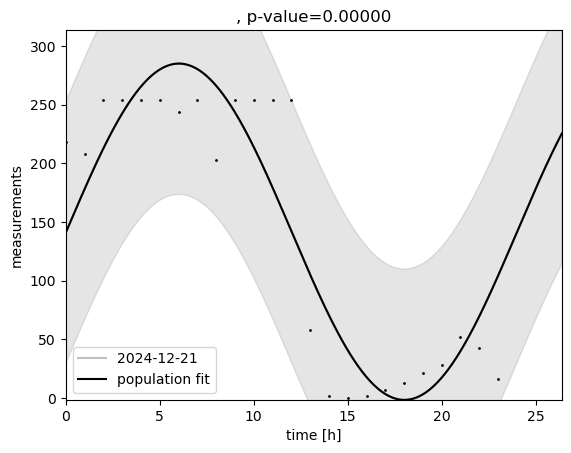

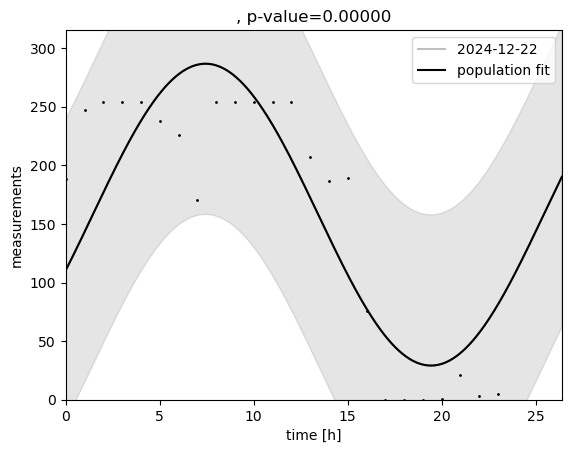

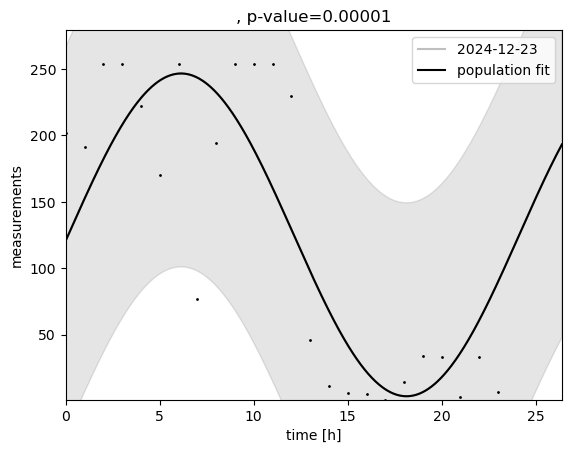

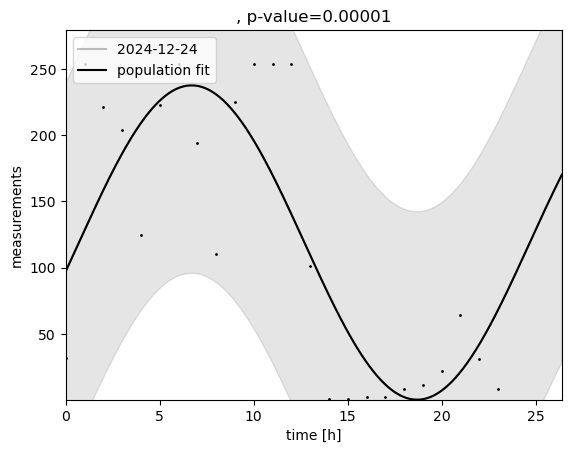

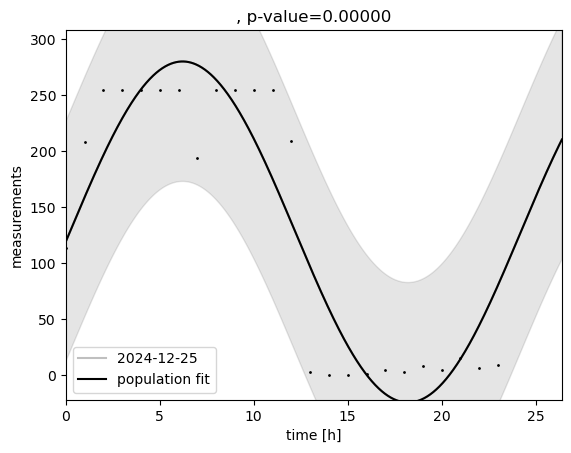

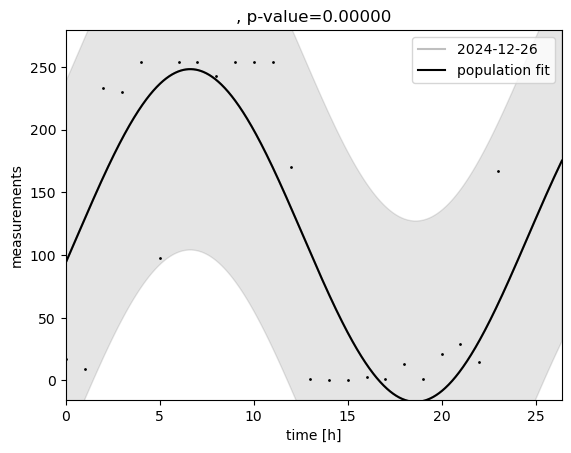

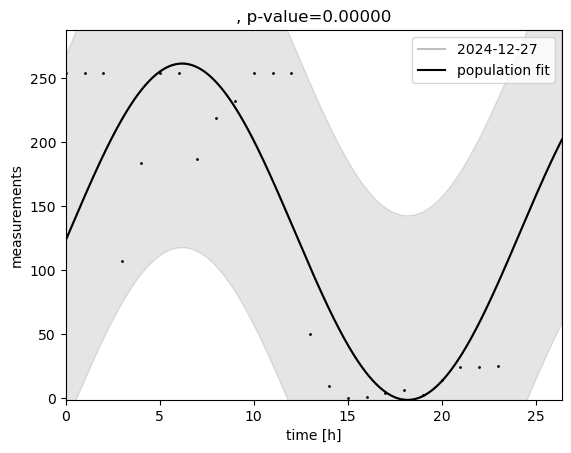

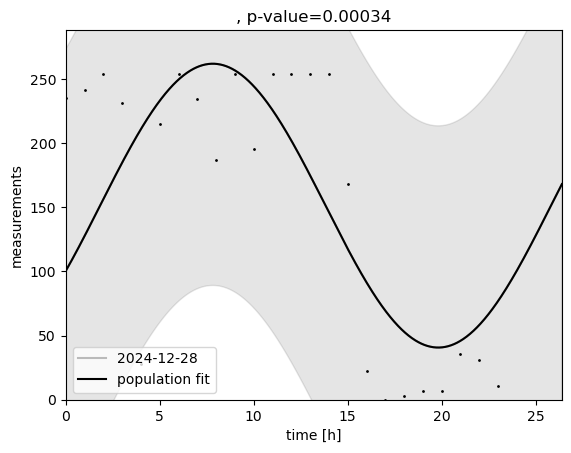

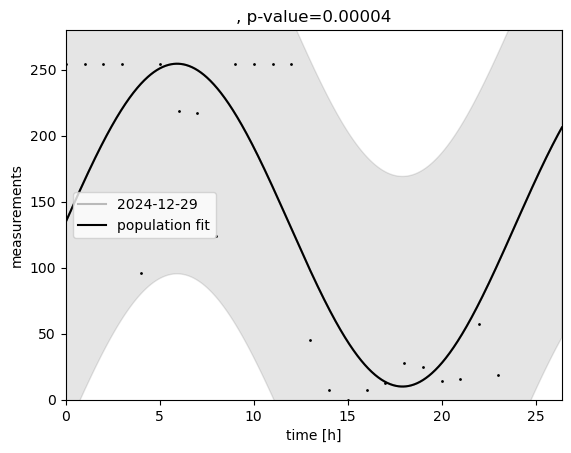

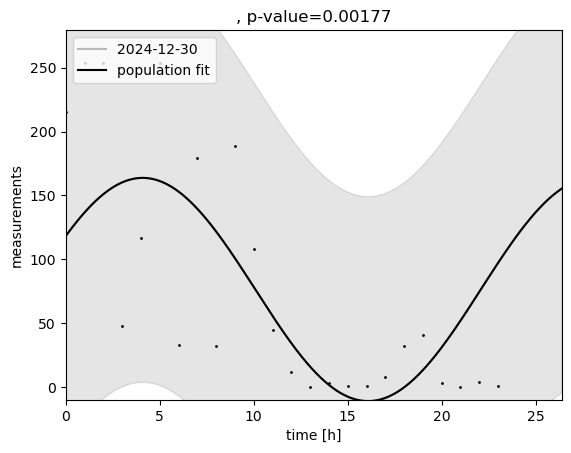

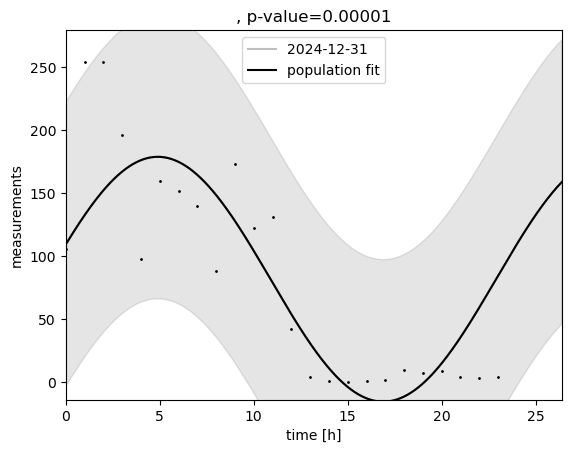

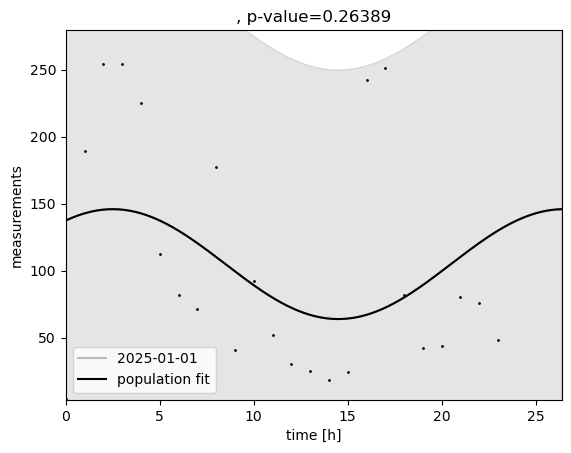

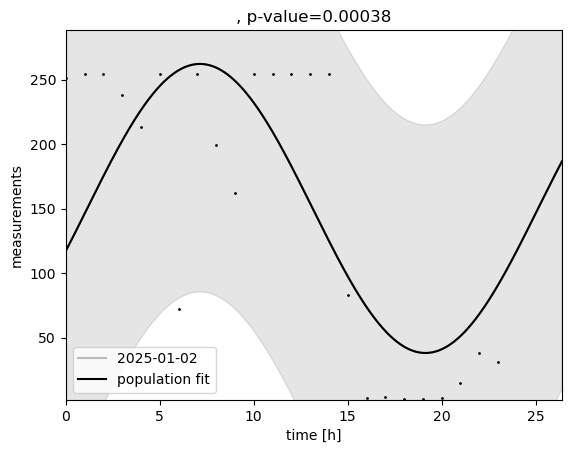

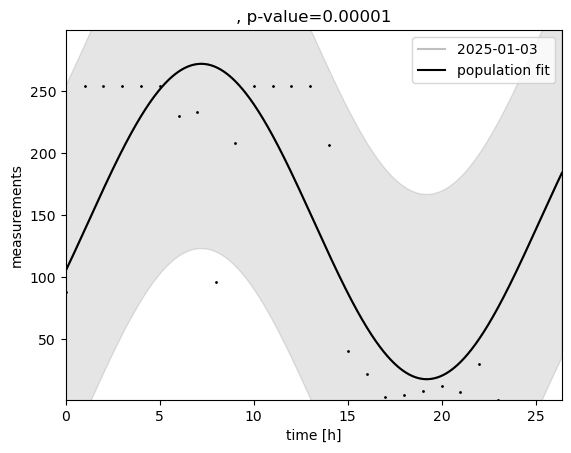

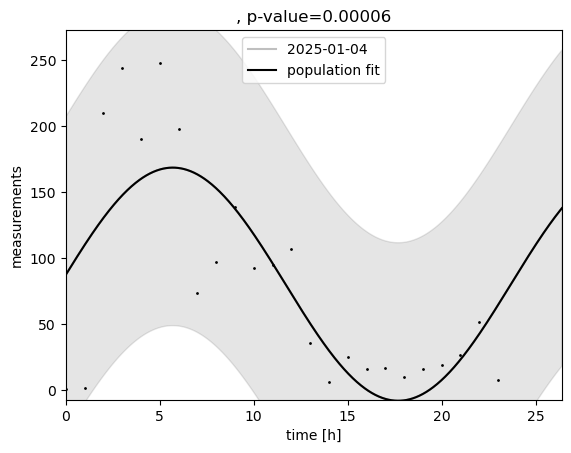

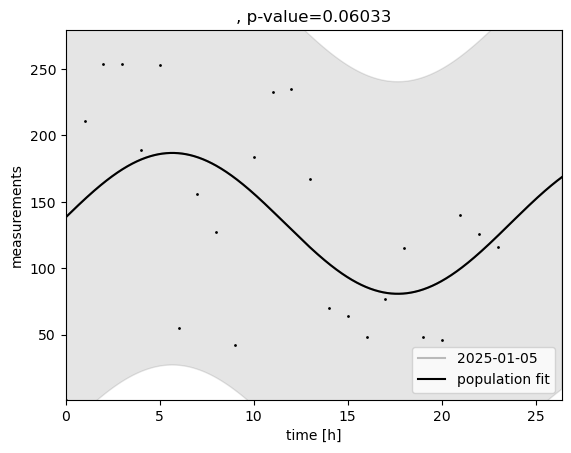

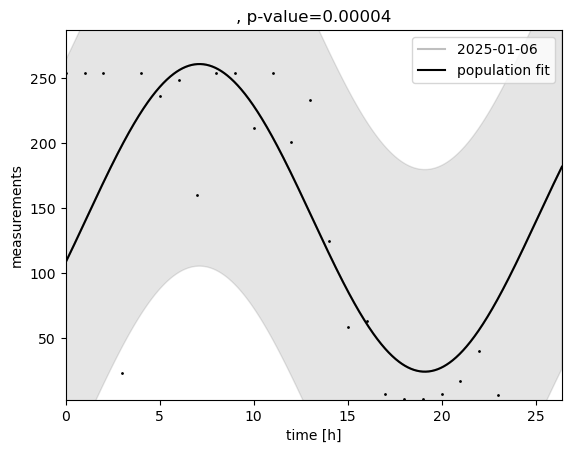

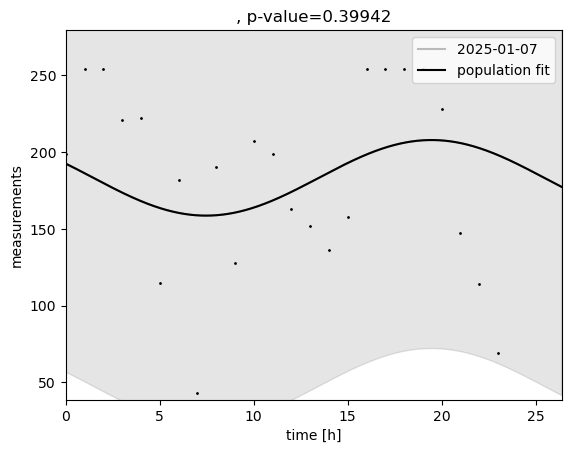

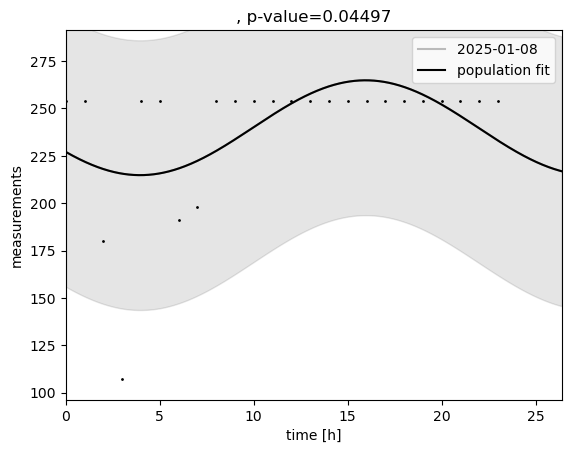

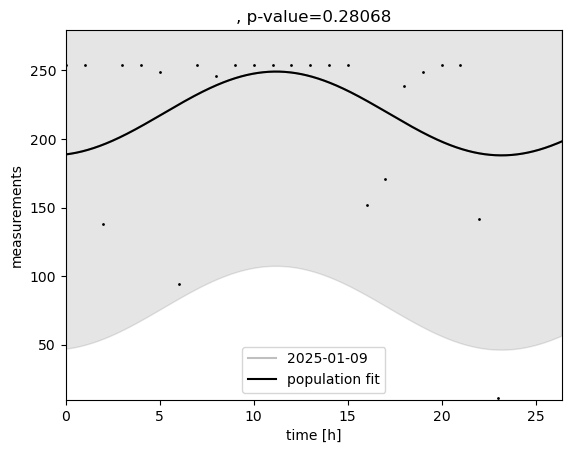

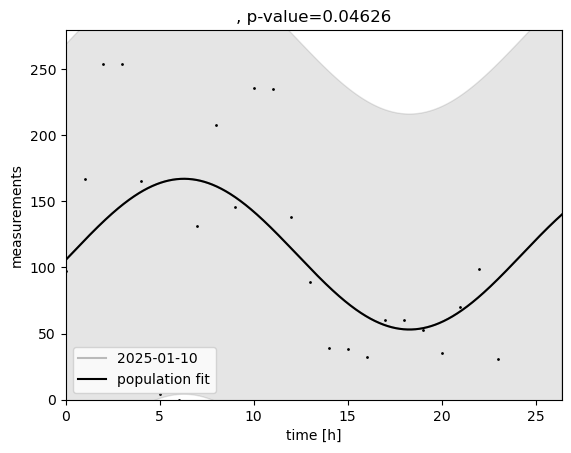

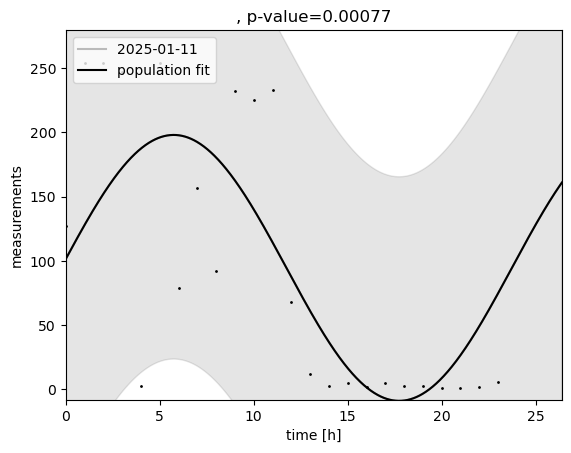

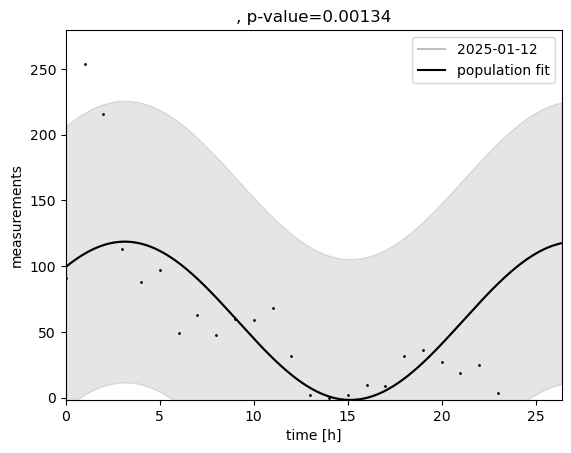

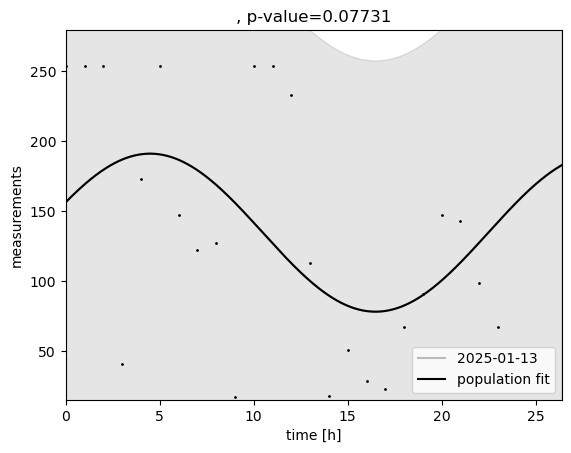

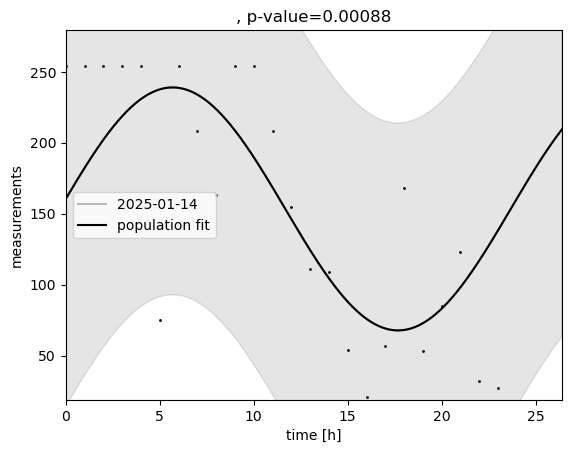

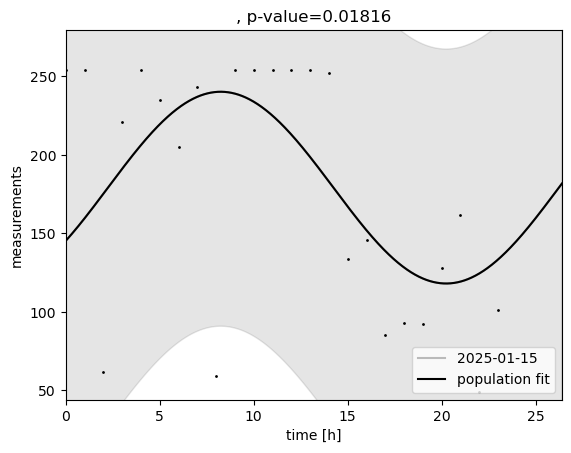

,test,period,n_components,p,q,p_reject,q_reject,RSS,amplitude,acrophase,...,resid_SE,mean(amplitude),p(amplitude),CI(amplitude),mean(acrophase),p(acrophase),CI(acrophase),mean(mesor),p(mesor),CI(mesor)
0,2024-12-19,24.0,1.0,7.210367e-02,8.052395e-02,NaN,NaN,9275.284076,168.328715,0.710711,...,43.070371,168.328715,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",0.710711,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-55.445181,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
1,2024-12-20,24.0,1.0,4.011205e-04,7.324809e-04,NaN,NaN,128649.633130,108.900036,-1.584948,...,78.269873,108.900036,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.584948,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",127.124928,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
2,2024-12-21,24.0,1.0,1.424462e-08,2.393096e-07,NaN,NaN,53657.952009,143.234155,-1.572369,...,50.548398,143.234155,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.572369,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",141.708177,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
3,2024-12-22,24.0,1.0,8.483388e-07,5.938372e-06,NaN,NaN,71409.444279,128.769105,-1.949737,...,58.313375,128.769105,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.949737,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",157.916517,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
4,2024-12-23,24.0,1.0,1.231184e-05,4.924736e-05,NaN,NaN,91713.426508,121.604747,-1.610106,...,66.085596,121.604747,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.610106,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",125.125195,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
5,2024-12-24,24.0,1.0,1.195565e-05,4.924736e-05,NaN,NaN,87034.899348,118.713786,-1.748474,...,64.377939,118.713786,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.748474,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",118.958200,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
6,2024-12-25,24.0,1.0,2.413220e-09,6.757016e-08,NaN,NaN,49494.106629,152.217027,-1.622684,...,48.547525,152.217027,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.622684,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",127.624663,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
7,2024-12-26,24.0,1.0,3.041685e-06,1.703344e-05,NaN,NaN,89751.451934,132.656572,-1.735895,...,65.374909,132.656572,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.735895,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",115.624693,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
8,2024-12-27,24.0,1.0,3.403526e-06,1.786851e-05,NaN,NaN,89593.647655,131.530537,-1.622684,...,65.317411,131.530537,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-1.622684,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",129.999695,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"
9,2024-12-28,24.0,1.0,3.412417e-04,6.666117e-04,NaN,NaN,128804.390890,110.563329,-2.050369,...,78.316936,110.563329,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",-2.050369,NaN,"[nan, <function nan_to_num at 0x120c725c0>]",151.208126,NaN,"[nan, <function nan_to_num at 0x120c725c0>]"


In [ ]:
df_results_post_data = cosinor.population_fit_group(prepare_data(post_data), n_components = [1,2,3], period=24, plot=False)
df_best_models_post_data = cosinor.get_best_models_population(prepare_data(pre_data), df_results_post_data, n_components = [1,2,3])
cosinor.plot_df_models_population(prepare_data(post_data), df_best_models_post_data)
df_best_models_post_data